<a href="https://colab.research.google.com/github/agulhane090398/PythonViz/blob/main/OLA_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: OLA - Ensemble Learning

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

* Demographics (city, age, gender etc.)
* Tenure information (joining date, Last Date)
* Historical data regarding the performance of the driver (Quarterly rating,  Monthly business acquired, grade, Income)


**Column Profiling:**

* MMMM-YY : Reporting Date (Monthly)
* Driver_ID : Unique id for drivers
* Age : Age of the driver
* Gender : Gender of the driver – Male : 0, Female: 1
* City : City Code of the driver
* Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
* Income : Monthly average Income of the driver
* Date Of Joining : Joining date for the driver
* LastWorkingDate : Last date of working for the driver
* Joining Designation : Designation of the driver at the time of joining
* Grade : Grade of the driver at the time of reporting
* Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
* Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [1]:
import os

import random
#For dealing with tables
import pandas as pd
#For dealing with linear algebra
import numpy as np
#For data visualization and plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
#For minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#For shapiro test
from scipy.stats import shapiro
#For train-test split
from sklearn.model_selection import train_test_split,GridSearchCV
#For RandomForest
from sklearn.ensemble import RandomForestClassifier
#Accuracy score, confusion matrix, classification report, ROC curve, AUC
from sklearn.metrics import f1_score
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
!gdown 182DW8YmgMFjyctycMJSznC5JO3K1K-Vm

Downloading...
From: https://drive.google.com/uc?id=182DW8YmgMFjyctycMJSznC5JO3K1K-Vm
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 64.7MB/s]


In [3]:
df=pd.read_csv("/content/ola_driver_scaler.csv")

In [4]:
df.head(10)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [5]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [8]:
df.describe()

,MMM-YY,Driver_ID,Age,Gender,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,0.418749,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899
min,2019-01-01 00:00:00,1.000000,21.000000,0.000000,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,0.000000,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,0.000000,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,1.000000,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,1.000000,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000
std,NaN,810.705321,6.257912,0.493367,0.800167,30914.515344,NaN,NaN,0.836984,1.026512,1.128312e+06,1.009832


##Check for missing value

In [9]:
df.isnull().sum()/len(df)*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


In [10]:
df.Gender.value_counts()

,count
Gender,
0.0,11074
1.0,7978


In [11]:
df.Education_Level.value_counts()

,count
Education_Level,
1,6864
2,6327
0,5913


##KNN Imputation

In [12]:
df_num = df.select_dtypes(np.number)

In [13]:
df_num.head()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1
4,2,31.0,0.0,2,67016,2,2,0,1


In [14]:
df_num.isnull().sum()

,0
Driver_ID,0
Age,61
Gender,52
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [15]:
df_num.drop(columns=["Driver_ID"],inplace=True)
columns=df_num.columns

In [16]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform',  metric='nan_euclidean')
df_num_new = imputer.fit_transform(df_num)
df_num_new = pd.DataFrame(df_num_new, columns=columns)
df_num_new

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...
19099,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [17]:
df_num_new.isnull().sum()

,0
Age,0
Gender,0
Education_Level,0
Income,0
Joining Designation,0
Grade,0
Total Business Value,0
Quarterly Rating,0


In [18]:
# Lets concat remaining columns
remaining_columns = list(set(df.columns) - set(columns))
df1 = pd.concat([df[remaining_columns], df_num_new], axis=1)
df1

,MMM-YY,City,Driver_ID,Dateofjoining,LastWorkingDate,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,C23,1,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,C23,1,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,C23,1,2018-12-24,2019-03-11,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,2020-11-01,C7,2,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
4,2020-12-01,C7,2,2020-11-06,NaT,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2020-08-01,C27,2788,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,740280.0,3.0
19100,2020-09-01,C27,2788,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,448370.0,3.0
19101,2020-10-01,C27,2788,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,0.0,2.0
19102,2020-11-01,C27,2788,2020-06-08,NaT,30.0,0.0,2.0,70254.0,2.0,2.0,200420.0,2.0


In [19]:
df1[df1['Driver_ID']==1]

,MMM-YY,City,Driver_ID,Dateofjoining,LastWorkingDate,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,C23,1,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,2019-02-01,C23,1,2018-12-24,NaT,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,2019-03-01,C23,1,2018-12-24,2019-03-11,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0


##Lets group data with driver id

In [20]:
fun_agg = {'Age':'max', 'Gender':'last', 'City':'first', 'Education_Level':'last', 'Income':'last', 'Joining Designation':'last', 'Grade':'last', 'Total Business Value':'sum', 'Quarterly Rating':'last', 'Dateofjoining':'last', 'LastWorkingDate':'last'}

In [21]:
new_train=df1.groupby(['Driver_ID', 'MMM-YY']).agg(fun_agg)
new_train

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   
...                    ...     ...  ...              ...      ...   
2788      2020-08-01  30.0     0.0  C27              2.0  70254.0   
          2020-09-01  30.0     0.0  C27              2.0  70254.0   
          2020-10-01  30.0     0.0  C27              2.0  70254.0   
          2020-11-01  30.0     0.0  C27              2.0  70254.0   
          2020-12-01  30.0     0.0  C27              2.0  70254.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   
...                                   ...    ...                   ...   
2788      2020-08-01                  2.0    2.0              740280.0   
          2020-09-01                  2.0    2.0              448370.0   
          2020-10-01                  2.0    2.0                   0.0   
          2020-11-01                  2.0    2.0              200420.0   
          2020-12-01                  2.0    2.0              411480.0   

                      Quarterly Rating Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                      
1         2019-01-01               2.0    2018-12-24             NaT  
          2019-02-01               2.0    2018-12-24             NaT  
          2019-03-01               2.0    2018-12-24      2019-03-11  
2         2020-11-01               1.0    2020-11-06             NaT  
          2020-12-01               1.0    2020-11-06             NaT  
...                                ...           ...             ...  
2788      2020-08-01               3.0    2020-06-08             NaT  
          2020-09-01               3.0    2020-06-08             NaT  
          2020-10-01               2.0    2020-06-08             NaT  
          2020-11-01               2.0    2020-06-08             NaT  
          2020-12-01               2.0    2020-06-08             NaT  

[19104 rows x 11 columns]

In [22]:
dff = new_train.sort_index(ascending=[True,True])
dff.head()

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade  Total Business Value  \
Driver_ID MMM-YY                                                         
1         2019-01-01                  1.0    1.0             2381060.0   
          2019-02-01                  1.0    1.0             -665480.0   
          2019-03-01                  1.0    1.0                   0.0   
2         2020-11-01                  2.0    2.0                   0.0   
          2020-12-01                  2.0    2.0                   0.0   

                      Quarterly Rating Dateofjoining LastWorkingDate  
Driver_ID MMM-YY                                                      
1         2019-01-01               2.0    2018-12-24             NaT  
          2019-02-01               2.0    2018-12-24             NaT  
          2019-03-01               2.0    2018-12-24      2019-03-11  
2         2020-11-01               1.0    2020-11-06             NaT  
          2020-12-01               1.0    2020-11-06             NaT

In [23]:
dff1 = pd.DataFrame()
dff1['Driver_ID'] = df1['Driver_ID'].unique()

##Aggregation at Driver Level

In [24]:
dff1['Age'] = list(dff.groupby('Driver_ID', axis=0).max('MMM-YY')['Age'])
dff1['Gender'] = list(dff.groupby('Driver_ID', axis=0).agg({'Gender':'last'})['Gender'])
dff1['City'] = list(dff.groupby('Driver_ID', axis=0).agg({'City':'last'})['City'])
dff1['Education_Level'] = list(dff.groupby('Driver_ID', axis=0).agg({'Education_Level':'last'})['Education_Level'])
dff1['Income'] = list(dff.groupby('Driver_ID', axis=0).agg({'Income':'last'})['Income'])
dff1['Joining_Designation'] = list(dff.groupby('Driver_ID', axis=0).agg({'Joining Designation':'last'})['Joining Designation'])
dff1['Grade'] = list(dff.groupby('Driver_ID', axis=0).agg({'Grade':'last'})['Grade'])
dff1['Total_Business_Value'] = list(dff.groupby('Driver_ID', axis=0).agg({'Total Business Value':'sum'})['Total Business Value'])
dff1['Last_Quarterly_Rating'] = list(dff.groupby('Driver_ID', axis=0).agg({'Quarterly Rating':'last'})['Quarterly Rating'])

dff1.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0


###Lets check if driver's rating was increased or not? if yes:1 No:0

In [25]:
# Rating for first time
qrf = dff.groupby('Driver_ID', axis=0).agg({'Quarterly Rating':'first'})
# Rating for last time
qrl = dff.groupby('Driver_ID', axis=0).agg({'Quarterly Rating':'last'})
# dataset with true/false value
qr = (qrf['Quarterly Rating'] < qrl['Quarterly Rating']).reset_index()

# employee with rating increase
emp_id = qr[qr['Quarterly Rating']==True]['Driver_ID']

qri = []

for i in dff1['Driver_ID']:
  if i in emp_id:
    qri.append(1)
  else:
    qri.append(0)
dff1['Quarterly_Rating_Increased'] = qri
dff1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0


##Defining Target column:
if driver has last working day i.e driver has churn and will allot value 1 else 0

In [26]:
lwr = (dff.groupby('Driver_ID', axis=0).agg({'LastWorkingDate':'last'}))['LastWorkingDate'].isna().reset_index()

# emp who has last working day and didn't churn
emp_id = lwr[lwr['LastWorkingDate']==True]['Driver_ID']

target = []

for i in dff1['Driver_ID']:
  if i in emp_id.values:
    target.append(0)
  else:
    target.append(1)
dff1['Target'] = target
dff1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,1,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1


###Let check if income has increased or not

In [27]:
# first income
qif = dff.groupby('Driver_ID', axis=0).agg({'Income':'first'})
# last income
qil = dff.groupby('Driver_ID', axis=0).agg({'Income':'last'})
# dataset with true/false value
qi = (qif['Income'] < qil['Income']).reset_index()

# driver who's monthly income increased
empid = qi[qi['Income']==True]['Driver_ID']

qir = []

for i in dff1['Driver_ID']:
  if i in empid.values:
    qir.append(1)
  else:
    qir.append(0)
dff1['Income_Increased'] = qir
dff1['Income_Increased'].value_counts()

,count
Income_Increased,
0,2338
1,43


In [28]:
dff1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,1,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,0,0,0
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,0,1,0
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,0,1,0
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,0,1,0


In [29]:
dff1.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.770181,0.410584,1.00756,59334.157077,1.820244,2.096598,4.586742e+06,1.427971,0.128097,0.678706,0.018060
std,806.161628,5.933265,0.491496,0.81629,28383.666384,0.841433,0.941522,9.127115e+06,0.809839,0.334268,0.467071,0.133195
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.385530e+06,1.000000,0.000000,0.000000,0.000000
25%,695.000000,30.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000
50%,1400.000000,33.000000,0.000000,1.00000,55315.000000,2.000000,2.000000,8.176800e+05,1.000000,0.000000,1.000000,0.000000
75%,2100.000000,37.000000,1.000000,2.00000,75986.000000,2.000000,3.000000,4.173650e+06,2.000000,0.000000,1.000000,0.000000
max,2788.000000,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,9.533106e+07,4.000000,1.000000,1.000000,1.000000


There are 2381 drivers in the dataset. The minimum age of the driver in the data is 21 years and the maximum age is 58 years. 75% of the drivers have their monthly income less than or equal to 75,986 units. 50% of the drivers have acquired 8,17,680 as the their total business value.

In [30]:
dff1.describe(include=['O'])

,City
count,2381
unique,29
top,C20
freq,152


Most of the driver in the dataset were male, lived in C20 city and have completed their Masters in education.

In [31]:
dff1['Target'].value_counts()

,count
Target,
1,1616
0,765


Out of 2381 drivers, 1616 drivers have left the organization.

In [32]:
dff1['Target'].value_counts(normalize=True)*100

,proportion
Target,
1,67.870643
0,32.129357


Around 68% drivers have left the organization.

<Axes: xlabel='Target'>

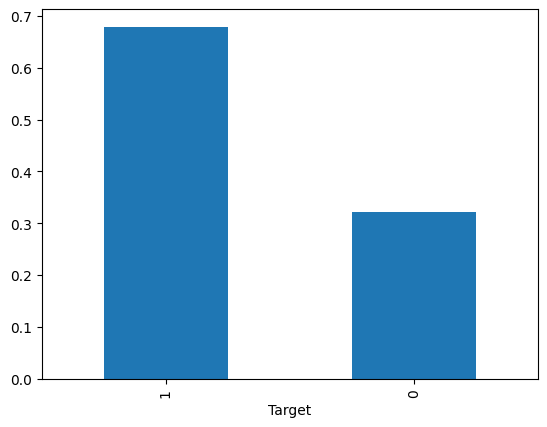

In [33]:
dff1['Target'].value_counts(normalize=True).plot(kind='bar')

###We have Categorical columns: Gender, City, Education, Joining_Designation, Designation, Last_Quarterly_Rating, Quarterly_Rating_Increased

In [34]:
n = ['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade', 'Last_Quarterly_Rating', 'Quarterly_Rating_Increased', 'Income_Increased']

for i in n:
  print(dff1[i].value_counts())
  print('----------------------------------->')

Gender
0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: count, dtype: int64
----------------------------------->
City
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: count, dtype: int64
----------------------------------->
Education_Level
2.0    802
1.0    795
0.0    784
Name: count, dtype: int64
----------------------------------->
Joining_Designation
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: count, dtype: int64
----------------------------------->
Grade
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: count, dtype: int64
----------------------------------->
Last_Quarterly_Rating
1.0    1744
2.0     362
3.0     168
4.0     107
Name: count, dtype: int64
--------



*  Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
* Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
* Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
* Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
* Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
* Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
* Out of 2381 employees, the quarterly rating has not increased for 2076 employees.



In [35]:
n = ['Gender', 'City', 'Education_Level', 'Joining_Designation', 'Grade', 'Last_Quarterly_Rating', 'Quarterly_Rating_Increased', 'Income_Increased']

for i in n:
  print(dff1[i].value_counts(normalize=True))
  print('----------------------------------->')

Gender
0.0    0.587988
1.0    0.409492
0.6    0.001260
0.2    0.000840
0.4    0.000420
Name: proportion, dtype: float64
----------------------------------->
City
C20    0.063839
C15    0.042419
C29    0.040319
C26    0.039059
C8     0.037379
C27    0.037379
C10    0.036119
C16    0.035279
C22    0.034439
C3     0.034439
C28    0.034439
C12    0.034019
C5     0.033599
C1     0.033599
C21    0.033179
C14    0.033179
C6     0.032759
C4     0.032339
C7     0.031919
C9     0.031499
C25    0.031079
C23    0.031079
C24    0.030659
C19    0.030239
C2     0.030239
C17    0.029819
C13    0.029819
C18    0.028979
C11    0.026879
Name: proportion, dtype: float64
----------------------------------->
Education_Level
2.0    0.336833
1.0    0.333893
0.0    0.329273
Name: proportion, dtype: float64
----------------------------------->
Joining_Designation
1.0    0.430911
2.0    0.342293
3.0    0.207056
4.0    0.015120
5.0    0.004620
Name: proportion, dtype: float64
----------------------------------->


* Around 59% employees are of the Male gender.
* Around 6.4% employees are from city C20 and 4.2% from city C15.
* The proportion of the employees who have completed their Graduate and 12th is approximately same.
* Around 43% of the employees joined with the grade 1.
* At the time of reporting, 34% of the employees had their grade as 2.
* Around 73% of the employees had their last quarterly rating as 1.
* The quarterly rating has not increased for around 87% employees.

<Axes: title={'center': 'City'}, xlabel='City'>

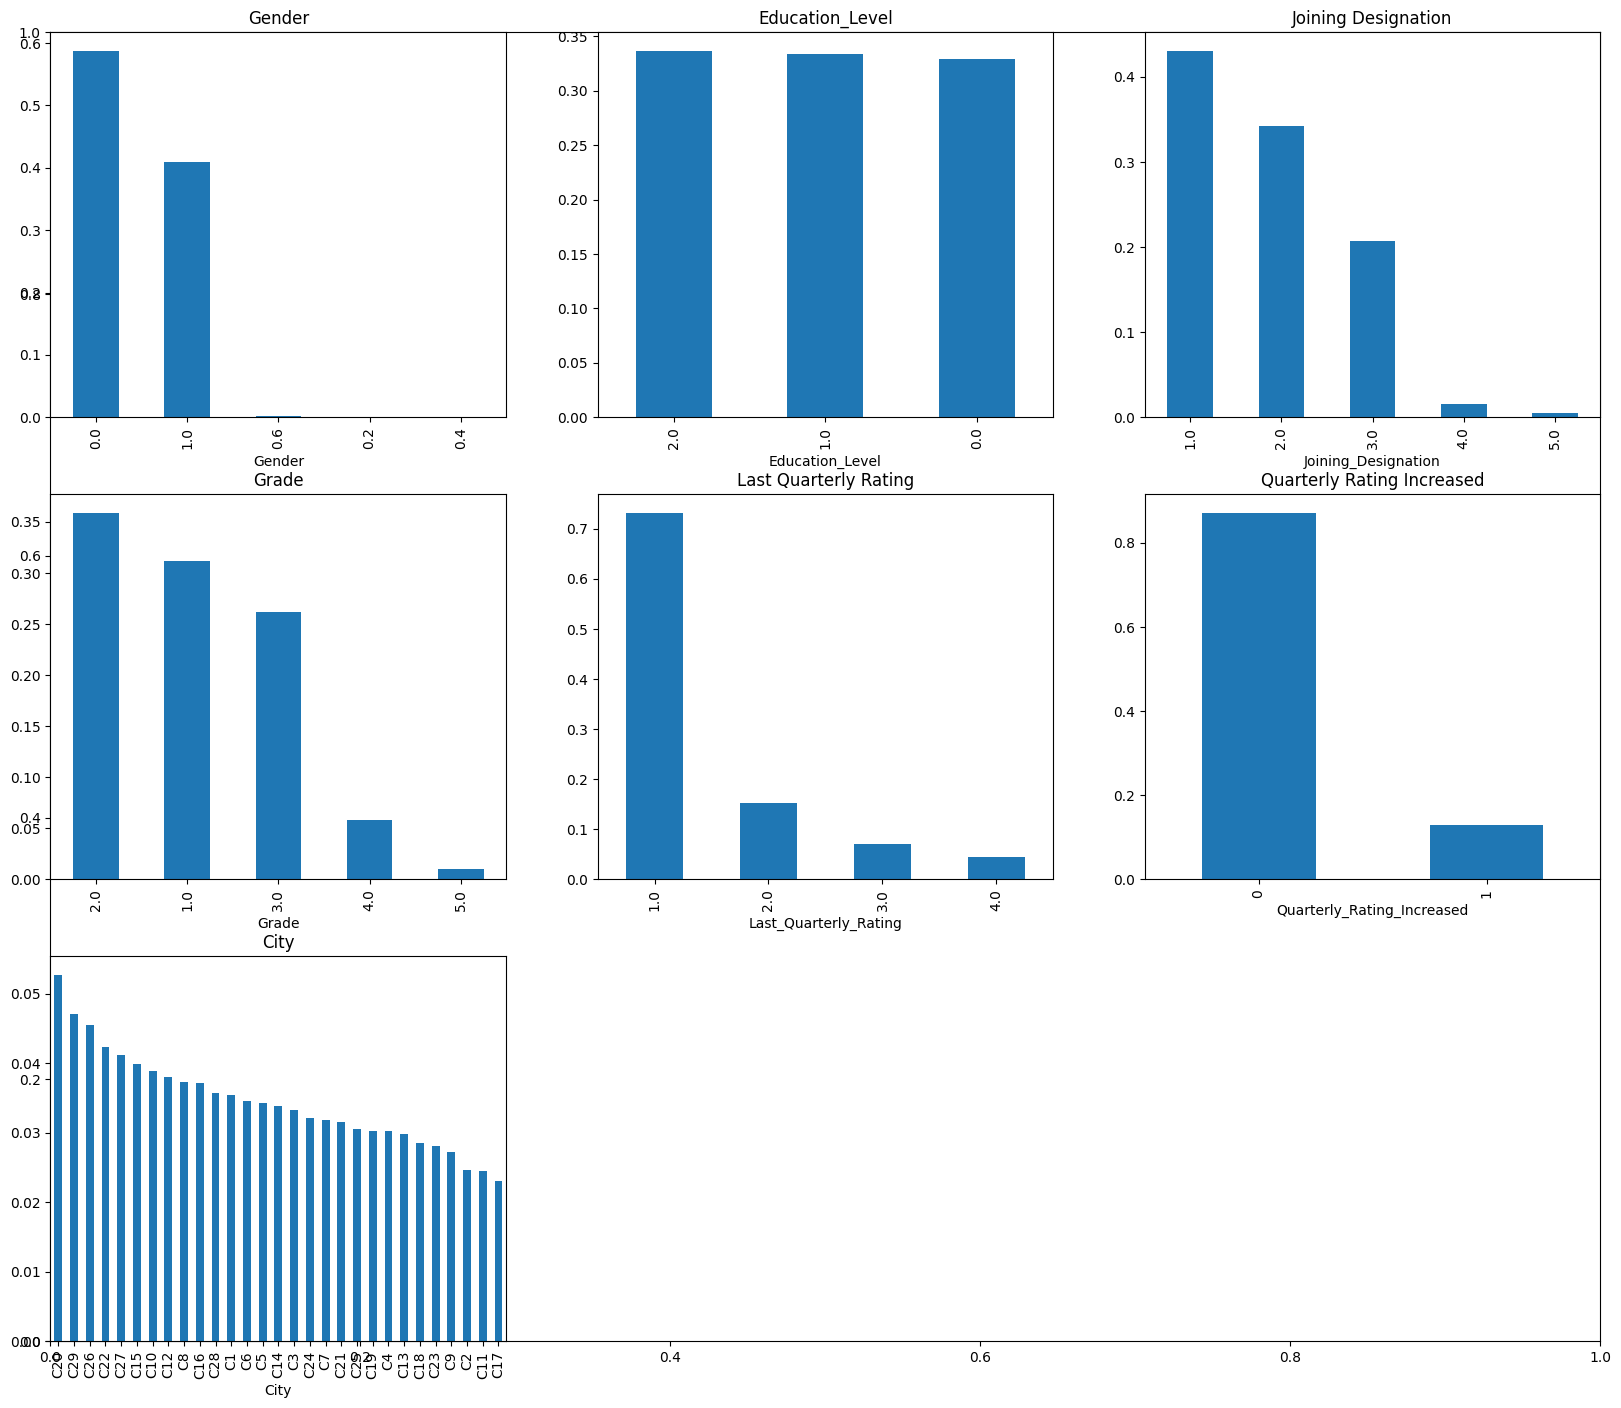

In [36]:
n = ['Gender','City','Joining_Designation','Grade','Last_Quarterly_Rating','Quarterly_Rating_Increased']

plt.subplots(figsize=(20,17))
plt.subplot(331)
dff1['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

plt.subplot(332)
dff1['Education_Level'].value_counts(normalize=True).plot.bar(title='Education_Level')

plt.subplot(333)
dff1['Joining_Designation'].value_counts(normalize=True).plot.bar(title='Joining Designation')

plt.subplot(334)
dff1['Grade'].value_counts(normalize=True).plot.bar(title='Grade')

plt.subplot(335)
dff1['Last_Quarterly_Rating'].value_counts(normalize=True).plot.bar(title='Last Quarterly Rating')

plt.subplot(336)
dff1['Quarterly_Rating_Increased'].value_counts(normalize=True).plot.bar(title='Quarterly Rating Increased')
# plt.tight_layout()

plt.subplot(337)
df1['City'].value_counts(normalize=True).plot.bar(title='City')


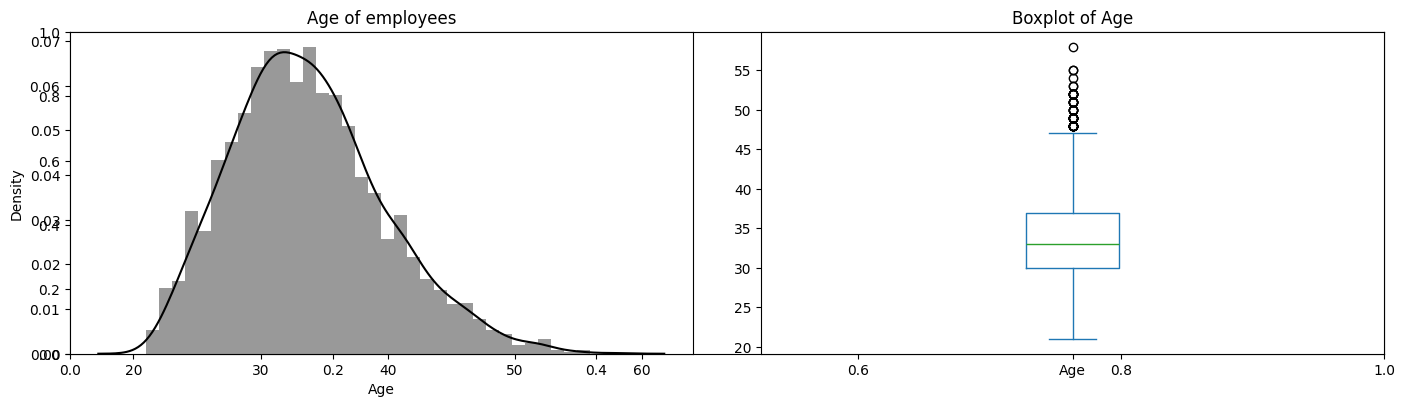

In [37]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(dff1['Age'],color='black')
plt.title("Age of employees")
plt.subplot(122)
dff1['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

There are few outliers in the Age. The distribution is towards the right.

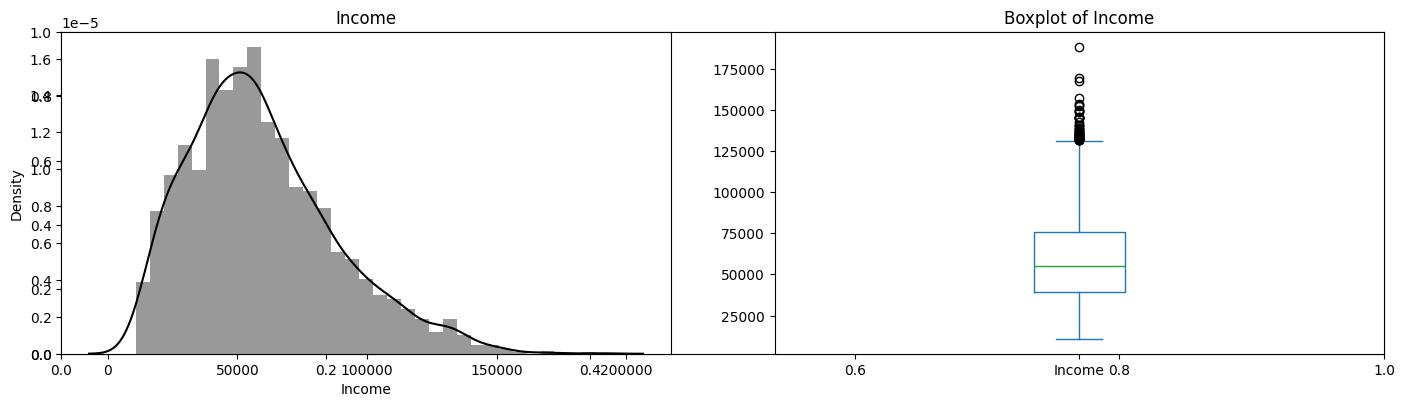

In [38]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(dff1['Income'],color='black')
plt.title("Income")
plt.subplot(122)
dff1['Income'].plot.box(title='Boxplot of Income')
plt.tight_layout(pad=3)

The distribution of Salary is towards the right and there are outliers for this feature as well.

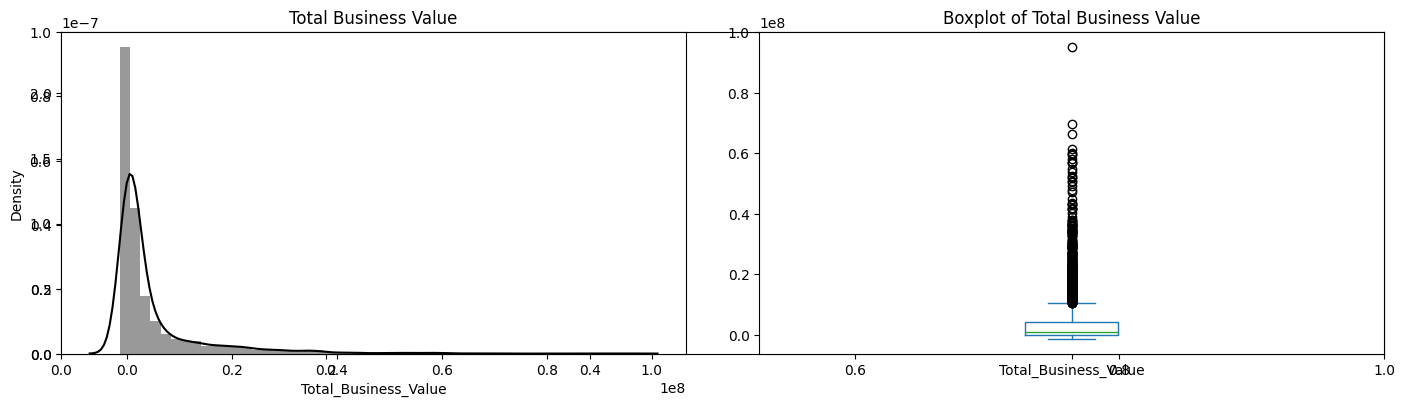

In [39]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(dff1['Total_Business_Value'],color='black')
plt.title("Total Business Value")
plt.subplot(122)
dff1['Total_Business_Value'].plot.box(title='Boxplot of Total Business Value')
plt.tight_layout(pad=3)

The distribution of total business value is towards the right. There are a lot of outliers for the feature Total Business Value.

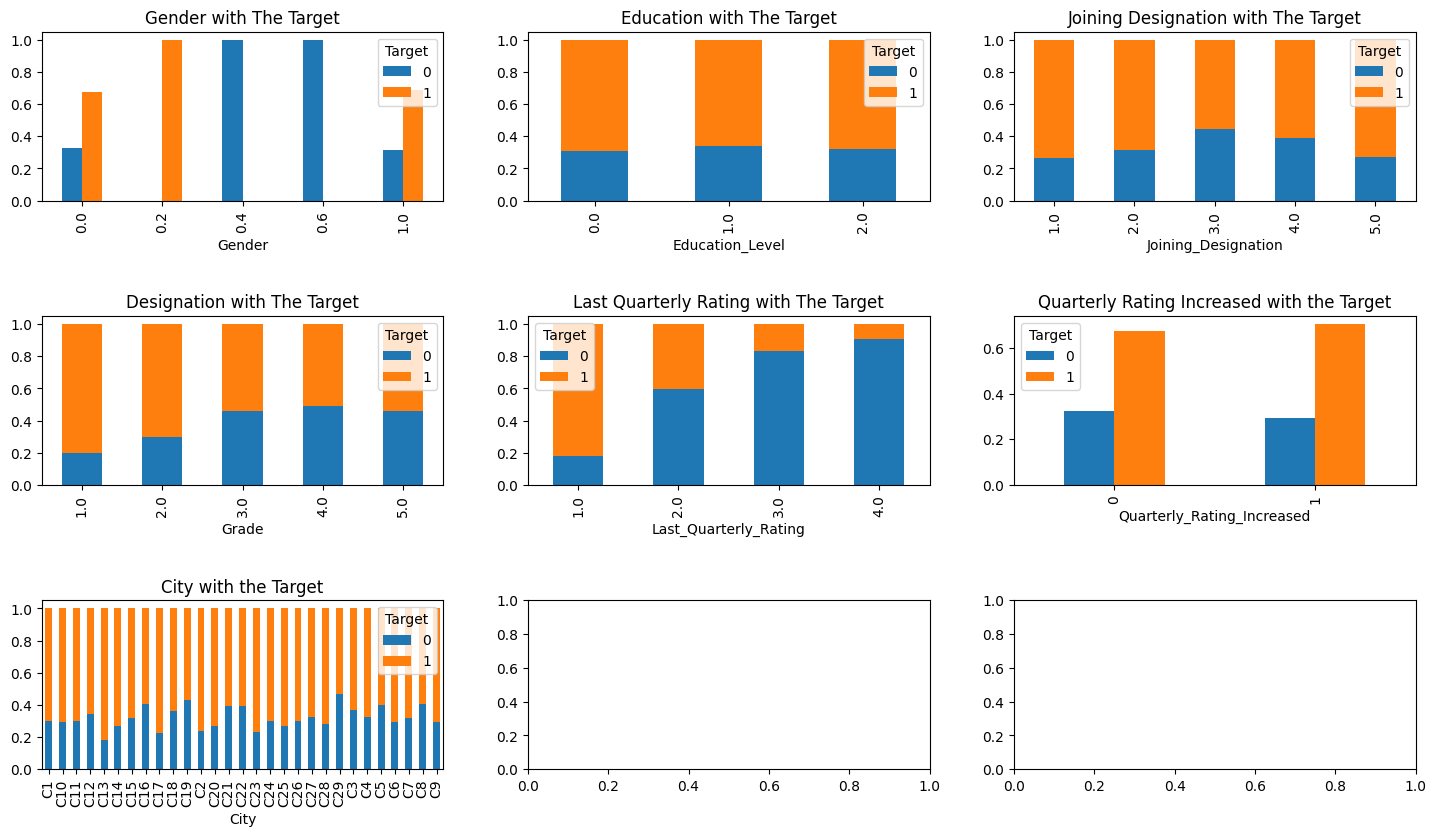

In [40]:
figure,axes=plt.subplots(3,3,figsize=(15,9))

#Gender feature with Target
gender = pd.crosstab(dff1['Gender'],dff1['Target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],title="Gender with The Target")

#Education feature with Target
education = pd.crosstab(dff1['Education_Level'],dff1['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],
                                                          title="Education with The Target")

#Joining Designation feature with Target
jde = pd.crosstab(dff1['Joining_Designation'],dff1['Target'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,2],
                                                      title="Joining Designation with The Target")

#Designation feature with Target
desig = pd.crosstab(dff1['Grade'],dff1['Target'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],
                                                    title="Designation with The Target")

#Last Quarterly Rating feature with Target
lqrate = pd.crosstab(dff1['Last_Quarterly_Rating'],dff1['Target'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],
                                                      title="Last Quarterly Rating with The Target")

#Quarterly Rating Increased feature with Target
qratei = pd.crosstab(dff1['Quarterly_Rating_Increased'],dff1['Target'])
qratei.div(qratei.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[1,2],
                                                         title="Quarterly Rating Increased with the Target")

#City feature with the target
city = pd.crosstab(dff1['City'],dff1['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[2,0],title="City with the Target")

plt.tight_layout(pad=3)

* The proportion of gender and education is more or less the same for both the employees who left the organization and those who did not leave.
* The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
* The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
* The employees whose quarterly rating has increased are less likely to leave the organization.

<Axes: title={'center': 'Age with Target'}, xlabel='Age_Bin'>

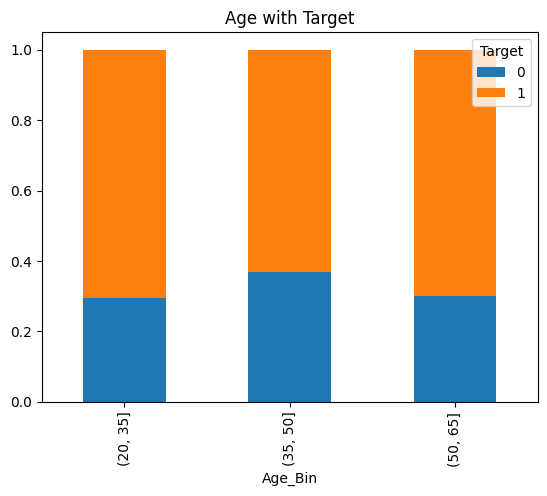

In [41]:
#Binning the Age into categories
dff1['Age_Bin'] = pd.cut(dff1['Age'],bins=[20,35,50,65])

#Age feature with Target
agebin = pd.crosstab(dff1['Age_Bin'],dff1['Target'])
agebin.div(agebin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Age with Target")

The drivers whose age is in the 20-35 or 50-65 groups are less likely to leave the organization.

<Axes: title={'center': 'Income with Target'}, xlabel='Income_Bin'>

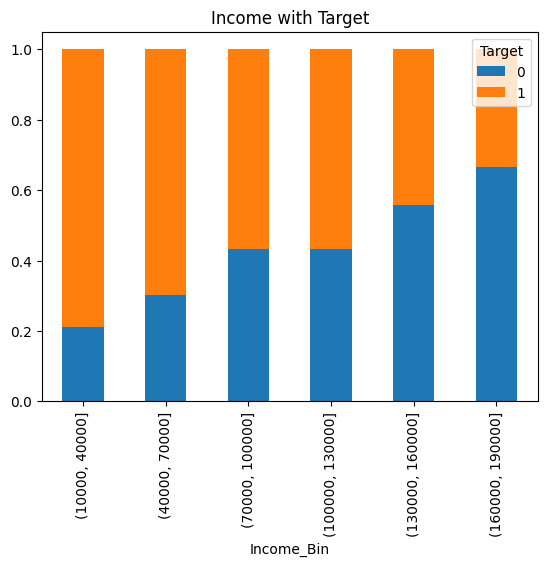

In [42]:
#Binning the Income into categories
dff1['Income_Bin'] = pd.cut(dff1['Income'],bins=[10000, 40000, 70000, 100000, 130000, 160000, 190000 ])

#Salary feature with Target
salarybin = pd.crosstab(dff1['Income_Bin'],dff1['Target'])
salarybin.div(salarybin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Income with Target")

The drivers whose monthly income is in 1,60,000-1,90,000 or 1,30,000-1,60,000 are less likely to leave the organization.

<Axes: title={'center': 'Total Business Value with Target'}, xlabel='TBV_Bin'>

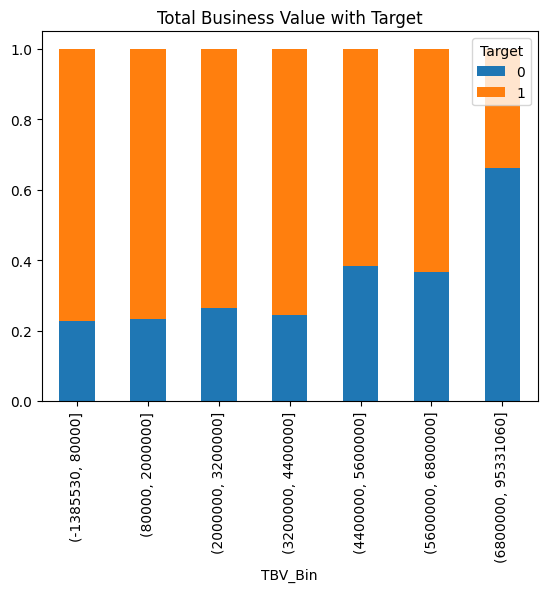

In [43]:
#Defining the bins and groups
m1 = round(dff1['Total_Business_Value'].min())
m2 = round(dff1['Total_Business_Value'].max())
bins = [m1, 80000 , 2000000 , 3200000, 4400000, 5600000, 6800000, m2]

#Binning the Total Business Value into categories
dff1['TBV_Bin'] = pd.cut(dff1['Total_Business_Value'],bins)

#Total Business Value feature with Target
tbvbin = pd.crosstab(dff1['TBV_Bin'],dff1['Target'])
tbvbin.div(tbvbin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,title="Total Business Value with Target")

The drivers who have acquired total business value greater than 68,00,000 are less likely to leave the organiztion.

In [44]:
# doping bin columns
dff1.drop(columns=['Age_Bin', 'Income_Bin', 'TBV_Bin'], inplace=True)
dff1.head()

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,1,1,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1,0
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,0,0,0


###Converting categorical variables to numeric values so that Machine Learning models can be applied.

In [45]:
dff1 = pd.concat([dff1, pd.get_dummies(dff1['City'], prefix='City')], axis=1)
dff1

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,...,False,False,False,False,False,False,False,True,False,False
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,6,31.0,1.0,C11,1.0,78728.0,3.0,3.0,1265000.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0.0,82815.0,2.0,3.0,21748820.0,4.0,...,False,False,False,False,False,False,False,False,False,False
2377,2785,34.0,1.0,C9,0.0,12105.0,1.0,1.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2378,2786,45.0,0.0,C19,0.0,35370.0,2.0,2.0,2815090.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2379,2787,28.0,1.0,C20,2.0,69498.0,1.0,1.0,977830.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Scaling the Data

X = dff1.drop(['Driver_ID', 'Target', 'City'], axis=1)
X_cols=X.columns

scaler = MinMaxScaler()
X=scaler.fit_transform(X)

X=pd.DataFrame(X,columns=X_cols)
X


,Age,Gender,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0.189189,0.0,1.0,0.262508,0.00,0.00,0.032064,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.270270,0.0,1.0,0.316703,0.25,0.25,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.594595,0.0,1.0,0.308750,0.25,0.25,0.017944,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.216216,0.0,0.0,0.200489,0.00,0.00,0.015570,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.270270,1.0,0.5,0.382623,0.50,0.50,0.027405,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.351351,0.0,0.0,0.405626,0.25,0.50,0.239197,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2377,0.351351,1.0,0.0,0.007643,0.00,0.00,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2378,0.648649,0.0,0.0,0.138588,0.25,0.25,0.043432,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2379,0.189189,1.0,1.0,0.330673,0.00,0.00,0.024436,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
y = dff1['Target']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1904, 39), (477, 39), (1904,), (477,))

##Random Forest with class weight sampling

In [53]:
from sklearn.utils import class_weight

param = {'max_depth' : [2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight='balanced')
c = GridSearchCV(random_forest, param, cv=3, scoring ='f1')
c.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [55]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print(f'Best score is: {results.best_score_}')

display(c)
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are: {'max_depth': 4, 'n_estimators': 150}
Best score is: 0.8450637102851667
              precision    recall  f1-score   support

           0       0.69      0.59      0.64       148
           1       0.83      0.88      0.85       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.78      0.79      0.79       477

[[ 87  61]
 [ 39 290]]


* The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 70%, and for 1 it is 82%(Precision).
* The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 58%, and for 1 it is 89%(Recall).

In [56]:
param = {'max_depth' : [2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight='balanced_subsample')
c = GridSearchCV(random_forest, param, cv=3, scoring ='f1')
c.fit(X_train, y_train)

def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print(f'Best score is: {results.best_score_}')

display(c)
y_pred = c.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are: {'max_depth': 2, 'n_estimators': 200}
Best score is: 0.8473352695118807
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       148
           1       0.83      0.81      0.82       329

    accuracy                           0.76       477
   macro avg       0.72      0.72      0.72       477
weighted avg       0.76      0.76      0.76       477

[[ 94  54]
 [ 62 267]]


* The Random Forest With Bootstrap Class Weighting method out of all predicted 0 the measure of correctly predicted is 69%, and for 1 it is 82%(Precision).
* The Random Forest With Bootstrap Class Weighting method out of all actual 0 the measure of correctly predicted is 58%, and for 1 it is 88%(Recall).

#Random Forest Classifier

In [57]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight ='balanced')

c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)

def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)

pred = c.predict(X_test)
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

Best parameters are : {'max_depth': 3, 'n_estimators': 150}
The score is : 0.8461775041071715
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       148
           1       0.84      0.79      0.82       329

    accuracy                           0.75       477
   macro avg       0.72      0.73      0.72       477
weighted avg       0.76      0.75      0.76       477

[[ 99  49]
 [ 69 260]]


* The Random Forest method out of all predicted 0 the measure of correctly predicted is 72%, and for 1 it is 82%(Precision).
* The Random Forest method out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 90%(Recall).

# XGBoot Classifier

In [58]:
import xgboost as xgb

my_model = xgb.XGBClassifier(class_weight='balanced')
my_model.fit(X_train, y_train)

y_pred = my_model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       148
           1       0.80      0.87      0.83       329

    accuracy                           0.76       477
   macro avg       0.72      0.69      0.70       477
weighted avg       0.75      0.76      0.75       477

[[ 77  71]
 [ 44 285]]


* The XGBoost method out of all predicted 0 the measure of correctly predicted is 60%, and for 1 it is 82%(Precision).
* The XGBoost method out of all actual 0 the measure of correctly predicted is 59%, and for 1 it is 82%(Recall).

#Decision Tree Classifier

In [59]:
clf =DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.48      0.54      0.51       148
           1       0.78      0.74      0.76       329

    accuracy                           0.68       477
   macro avg       0.63      0.64      0.64       477
weighted avg       0.69      0.68      0.68       477

[[ 80  68]
 [ 85 244]]


* The Decision Tree method out of all predicted 0 the measure of correctly predicted is 47%, and for 1 it is 79%(Precision).
* The Decision Tree method out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 71%(Recall).

#Result Analysis

* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset.
* Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

Feature Importance for best model

In [61]:
param = {'max_depth': [2,3,4], 'n_estimators':[50,100,150,200]}

random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train, y_train)

def display(c):
  print(f'Best parameters are: {c.best_params_}')
  print(f'Best score is: {c.best_score_}')

display(c)


Best parameters are: {'max_depth': 3, 'n_estimators': 150}
Best score is: 0.8461775041071715


In [62]:
import time
import numpy as np

start_time = time.time()

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.060 seconds


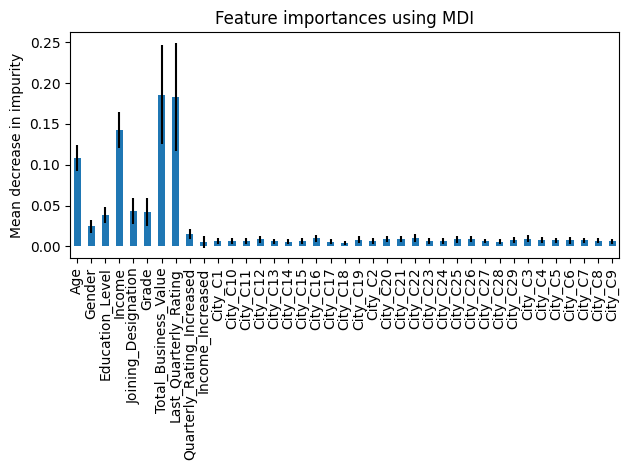

In [63]:
forest_importances = pd.Series(random_forest.feature_importances_, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()